<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M6_Building_PoC_with_DB_backend_TinyDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TinyDB is a lightweight document-oriented database optimized for simplicity and ease of use. It doesn't use SQL queries like SQLite. Instead, it uses JSON-like structures to store and query data. 

In this part, we will learn:
> 1. How to load a CSV file into TinyDB 
> 2. How to run basic operations: SELECT, INSERT, UPDATE, and DELETE. 

We will be using Python and the TinyDB to perform this task. Finally, we will create an exercise in Google Colab to practice the concepts learned.

### Step 1: Loading the CSV file into a DataFrame



In [1]:
!pip install pandas tinydb --q

In [2]:
#importing the necessary libraries
import pandas as pd
from tinydb import TinyDB, Query

df = pd.read_csv('https://raw.githubusercontent.com/SrinidhiRaghavan/AI-Sentiment-Analysis-on-IMDB-Dataset/master/test/imdb_te.csv', encoding= 'unicode_escape', nrows=100)
df.head(2)

,row_number,text
0,0,Oh gosh!! I love movie sooooooooooooooooooooo ...
1,1,I saw Borderline several years ago AMC. I've l...


### Step 2: Creating a TinyDB database and table

In a new cell, create a new TinyDB database and table to store the CSV data:



In [3]:
db = TinyDB('example_tinydb.json')
table = db.table('reviews')


### Step 3: Loading the DataFrame into the TinyDB table

In a new cell, load the DataFrame into the TinyDB table:


In [4]:
%%time
for _, row in df.iterrows():
    table.insert(row.to_dict())

CPU times: user 115 ms, sys: 13.3 ms, total: 129 ms
Wall time: 545 ms


### Step 4: Running basic operations

Now we'll perform four basic operations: SELECT, INSERT, UPDATE, and DELETE.


In [5]:
# Select all records from the 'reviews' table
rows = table.all()


# Print the records
for row in rows[:3]:
    print(row)

{'row_number': 0, 'text': "Oh gosh!! I love movie sooooooooooooooooooooo much!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! It incredible......I loved wee babe still love adult. It favorite Disney movie allllllllllllllllllllllllllllll time! You watch it, watch love it. My friends I watch ton.....It soooooooooooooooooooooooooooooooooo good. I recommend anyone child child heart. My favorite part song dance number strays Thomas O'Malley. The writers/producers/director completely nailed one.....yeah, nailed wall.xoxo~Wolly~xoxo"}
{'row_number': 1, 'text': "I saw Borderline several years ago AMC. I've looking ever since. It haunting: visual, textural, sensual. This movie took somewhere like dream I didn't care where. I never forget curtain blowing breeze. I still remember way made tilt head. I remember facial expression I saw it. I didn't know happened movie over, I find life way. It didn't bother me. The unfairness ultimate rejection innocent character strikes sadly real. I loved faces, way camera d

In [6]:
# Select all records from the 'reviews' table
rows = table.search(Query().row_number >= 3)


# Print the records
for row in rows[:3]:
    print(row)

{'row_number': 3, 'text': "I like Full Moon Pictures I ordered movie USA, Germany can't get anywhere. I thought would nice amusing like Subspecies Puppetmaster Series, full atmosphere.I glad movie finally arrived.But watching cheesy movie, I disappointed. The actors ( I think can't even say actors) boring untalented. The story poor performance even set monster cheap lousy.I hope one ever make sequel remake terrible movie. :-)"}
{'row_number': 4, 'text': 'Worst horror film ever funniest film ever rolled one got see film cheap unbeliaveble see really!!!! P.s watch carrot'}
{'row_number': 5, 'text': "I first saw I teen last year Junior High. I riveted it! I loved special effects, fantastic places trial-aspect flashback method telling story.Several years later I read book interesting I could definitely see Swift trying say, I think it's perfect book social commentary, story movie better. It makes sense one long adventure Gulliver return voyage making profit selling tiny Lilliput sheep what

In [7]:
# Insert a new record into the 'reviews' table
new_record = {'row_number': 10000, 'text': 'Fantastic Film!'}
table.insert(new_record)

# Verify the insertion
rows = table.search(Query().text == 'Fantastic Film!')
print(rows)

[{'row_number': 10000, 'text': 'Fantastic Film!'}]


In [8]:
from tinydb import TinyDB, where

result = table.search(where('row_number') > 9999)
print(result)

[{'row_number': 10000, 'text': 'Fantastic Film!'}]


In [9]:
# To update data, you can use the update method along with a query. Here's an example:

table.update({'row_number': 10026}, where('text') == 'Fantastic Film!')

[101]

In [10]:
# To delete data, use the remove method along with a query. Here's an example:

table.remove(where('row_number') == 10026)

[101]

In [11]:
rows = table.search(Query().text == 'Fantastic Film!')
print(rows)

[]


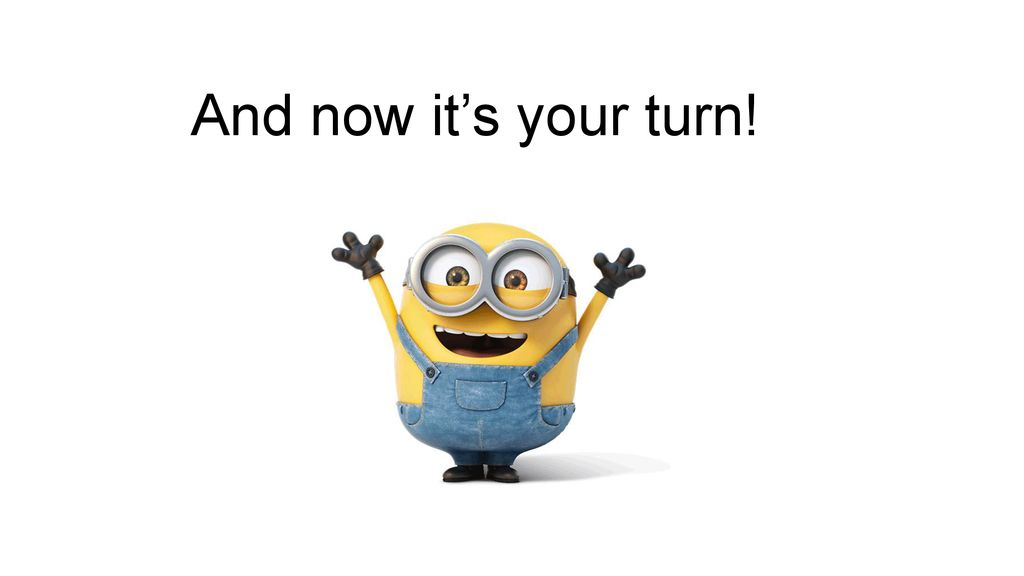

#Perform sentiment analysis on movie reviews stored in TinyDB

In this exercise, you should perform sentiment analysis on movie reviews stored in a TinyDB database

In [12]:
!pip install transformers --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.3 MB/s eta 0:00:00


###Step 1: Load the sentiment analysis model

In [13]:
from transformers import pipeline

# Load the pre-trained sentiment analysis model
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


###Step 2: Extract text for movie reviews
Next, we need to extract the movie reviews from our TinyDB database and analyze their sentiment using the classifier pipeline.

In [17]:
# Extract sentiment reviews for the movie reviews


In [22]:
for review in reviews:
  print(review)

{'row_number': 0, 'text': "Oh gosh!! I love movie sooooooooooooooooooooo much!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! It incredible......I loved wee babe still love adult. It favorite Disney movie allllllllllllllllllllllllllllll time! You watch it, watch love it. My friends I watch ton.....It soooooooooooooooooooooooooooooooooo good. I recommend anyone child child heart. My favorite part song dance number strays Thomas O'Malley. The writers/producers/director completely nailed one.....yeah, nailed wall.xoxo~Wolly~xoxo"}
{'row_number': 1, 'text': "I saw Borderline several years ago AMC. I've looking ever since. It haunting: visual, textural, sensual. This movie took somewhere like dream I didn't care where. I never forget curtain blowing breeze. I still remember way made tilt head. I remember facial expression I saw it. I didn't know happened movie over, I find life way. It didn't bother me. The unfairness ultimate rejection innocent character strikes sadly real. I loved faces, way camera d

In [34]:
# Iterate over the movie reviews and update the sentiment label for each one


In [35]:
# Extract sentiment reviews for the movie reviews


In [36]:
for review in reviews_updated:
  print(review)

{'row_number': 0, 'text': "Oh gosh!! I love movie sooooooooooooooooooooo much!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! It incredible......I loved wee babe still love adult. It favorite Disney movie allllllllllllllllllllllllllllll time! You watch it, watch love it. My friends I watch ton.....It soooooooooooooooooooooooooooooooooo good. I recommend anyone child child heart. My favorite part song dance number strays Thomas O'Malley. The writers/producers/director completely nailed one.....yeah, nailed wall.xoxo~Wolly~xoxo", 'sentiment': 1}
{'row_number': 1, 'text': "I saw Borderline several years ago AMC. I've looking ever since. It haunting: visual, textural, sensual. This movie took somewhere like dream I didn't care where. I never forget curtain blowing breeze. I still remember way made tilt head. I remember facial expression I saw it. I didn't know happened movie over, I find life way. It didn't bother me. The unfairness ultimate rejection innocent character strikes sadly real. I loved fac

In [37]:
from transformers import pipeline
from sklearn.metrics import accuracy_score

# Convert the data to a Pandas DataFrame


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Accuracy: 0.88


# Develop a similar approach based on your previous project, which involves saving a CSV file in TinyDB, updating the table (such as with new data), and using the updated table to train a model.

*   Step 1: Creating a TinyDB database and table
*   Step 2: Loading the CSV file into the TinyDB table
*   Step 3: Updating the table with new data
*   Step 4: Loading the updated table into a DataFrame
*   Step 5: Preparing the data for model training
*   Step 6: Training the model
*   Step 7: Evaluating the model